# Projeto Top Hits Spotify de 2000-2019

# 1. Contexto

Este dataset contém estatísticas de áudio das 2.000 principais faixas no Spotify de 2000 a 2019. Os dados contêm cerca de 18 colunas, cada uma descrevendo o atributo e suas especificações.

Fonte: https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019

Atributos/Colunas

1. artista: Nome do Artista.
    
2. música: Nome da Faixa.
    
3. duration_ms: Duração da trilha em milissegundos.

4. explícito: a letra ou o conteúdo de uma música ou videoclipe contém um ou mais dos critérios que podem ser considerados ofensivos ou inadequados para crianças.

5. ano: Ano de lançamento da faixa.

6. popularidade: quanto maior o valor, mais popular é a música.
    
7. dançabilidade: Dançabilidade descreve o quão adequada uma faixa é para dançar com base em uma combinação de elementos musicais, incluindo tempo, estabilidade do ritmo, força da batida e regularidade geral. Um valor de 0,0 é o menos dançável e 1,0 é o mais dançável.

8. energia: A energia é uma medida de 0,0 a 1,0 e representa uma medida perceptiva de intensidade e atividade.

9. Chave: A tonalidade em que a faixa está. Os inteiros são mapeados para pitchs usando a notação padrão de Pitch Class. Por exemplo. 0 = C, 1 = C♯/D♭, 2 = D, e assim por diante. Se nenhuma chave foi detectada, o valor é -1.

10. Volume: O volume geral de uma faixa em decibéis (dB). Os valores de volume são calculados em média em toda a faixa e são úteis para comparar o volume relativo das faixas. A sonoridade é a qualidade de um som que é o principal correlato psicológico da força física (amplitude). Os valores geralmente variam entre -60 e 0 db.

11. modo: Mode indica a modalidade (maior ou menor) de uma faixa, o tipo de escala da qual seu conteúdo melódico é derivado. Maior é representado por 1 e menor é 0.

12. fala: Speechiness detecta a presença de palavras faladas em uma faixa. Quanto mais exclusivamente falada a gravação (por exemplo, talk show, audiolivro, poesia), mais próximo de 1,0 o valor do atributo. Valores acima de 0,66 descrevem faixas que provavelmente são feitas inteiramente de palavras faladas. Valores entre 0,33 e 0,66 descrevem faixas que podem conter música e fala, seja em seções ou em camadas, incluindo casos como música rap. Os valores abaixo de 0,33 provavelmente representam músicas e outras faixas que não são de fala.

13. acústica: Uma medida de confiança de 0,0 a 1,0 se a faixa é acústica. 1.0 representa alta confiança de que a faixa é acústica.

14. instrumentalidade: prevê se uma faixa não contém vocais. Os sons "Ooh" e "aah" são tratados como instrumentais neste contexto. Faixas de rap ou de palavras faladas são claramente "vocais". Quanto mais próximo o valor de instrumentalidade estiver de 1,0, maior a probabilidade de a faixa não conter conteúdo vocal. Valores acima de 0,5 destinam-se a representar faixas instrumentais, mas a confiança é maior à medida que o valor se aproxima de 1,0.

15. vivacidade: Detecta a presença de uma audiência na gravação. Valores mais altos de vivacidade representam uma probabilidade maior de que a faixa tenha sido executada ao vivo. Um valor acima de 0,8 fornece uma forte probabilidade de que a faixa esteja ativa.

16. valência: Uma medida de 0,0 a 1,0 que descreve a positividade musical transmitida por uma faixa. Faixas com alta valência soam mais positivas (por exemplo, feliz, alegre, eufórica), enquanto faixas com baixa valência soam mais negativas (por exemplo, triste, deprimida, irritada).

17. tempo: o andamento geral estimado de uma faixa em batidas por minuto (BPM). Na terminologia musical, tempo é a velocidade ou ritmo de uma determinada peça e deriva diretamente da duração média da batida.

18. gênero: Gênero da faixa.

# 2. Objetivo do Projeto

O objetivo deste projeto é implementar e testar Rede MLP e rede K-Means na base de dados. Como target atribuimos a coluna <b>gênero</b>. Dessa forma, os atributos selecionados que irão compor as nossas variavéis dependentes serão aquelas que compõe uma canção na visão técnica, e que é pertencente a todas as canções, conforme detalhado as definições anteriormente. 
Os atributos que iremos selecionar como entrada serão: <b>popularidade, dancabilidade, energia, chave, volume, modo,
       fala, acustico, instrumentalidade, vivacidade, valencia e tempo </b>

# 3. Pré-Processamento

# Importando Bibliotecas

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
print("No Warning Shown")

No Warning Shown


# Lendo Dataset

In [3]:
dados = pd.read_csv('songs_normalize.csv')
dados.head()

artist                    song  duration_ms  explicit  year  \
0  Britney Spears  Oops!...I Did It Again       211160     False  2000   
1       blink-182    All The Small Things       167066     False  1999   
2      Faith Hill                 Breathe       250546     False  1999   
3        Bon Jovi            It's My Life       224493     False  2000   
4          *NSYNC             Bye Bye Bye       200560     False  2000   

   popularity  danceability  energy  key  loudness  mode  speechiness  \
0          77         0.751   0.834    1    -5.444     0       0.0437   
1          79         0.434   0.897    0    -4.918     1       0.0488   
2          66         0.529   0.496    7    -9.007     1       0.0290   
3          78         0.551   0.913    0    -4.063     0       0.0466   
4          65         0.614   0.928    8    -4.806     0       0.0516   

   acousticness  instrumentalness  liveness  valence    tempo         genre  
0        0.3000          0.000018    0.3550    0.894   95.053           pop  
1        0.0103          0.000000    0.6120    0.684  148.726     rock, pop  
2        0.1730          0.000000    0.2510    0.278  136.859  pop, country  
3        0.0263          0.000013    0.3470    0.544  119.992   rock, metal  
4        0.0408          0.001040    0.0845    0.879  172.656           pop

-  A fim de aplicar o estudo, iremos traduzir os nomes das colunas para a lingua portuguesa

In [4]:
dados.columns

Index(['artist', 'song', 'duration_ms', 'explicit', 'year', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'genre'],
      dtype='object')

In [5]:
colunas = {'artist':'artista', 'song':'musica', 'duration_ms':'duracao_ms', 'explicit':'explicita', 'year':'ano', 'popularity':'popularidade',
       'danceability':'dancabilidade', 'energy':'energia', 'key':'chave', 'loudness':'volume', 'mode':'modo', 'speechiness':'fala',
       'acousticness':'acustico', 'instrumentalness':'instrumentalidade', 'liveness':'vivacidade', 'valence':'valencia', 'tempo':'tempo',
       'genre':'genero'}
dados.rename(columns=colunas, inplace=True)
dados.head()

artista                  musica  duracao_ms  explicita   ano  \
0  Britney Spears  Oops!...I Did It Again      211160      False  2000   
1       blink-182    All The Small Things      167066      False  1999   
2      Faith Hill                 Breathe      250546      False  1999   
3        Bon Jovi            It's My Life      224493      False  2000   
4          *NSYNC             Bye Bye Bye      200560      False  2000   

   popularidade  dancabilidade  energia  chave  volume  modo    fala  \
0            77          0.751    0.834      1  -5.444     0  0.0437   
1            79          0.434    0.897      0  -4.918     1  0.0488   
2            66          0.529    0.496      7  -9.007     1  0.0290   
3            78          0.551    0.913      0  -4.063     0  0.0466   
4            65          0.614    0.928      8  -4.806     0  0.0516   

   acustico  instrumentalidade  vivacidade  valencia    tempo        genero  
0    0.3000           0.000018      0.3550     0.894   95.053           pop  
1    0.0103           0.000000      0.6120     0.684  148.726     rock, pop  
2    0.1730           0.000000      0.2510     0.278  136.859  pop, country  
3    0.0263           0.000013      0.3470     0.544  119.992   rock, metal  
4    0.0408           0.001040      0.0845     0.879  172.656           pop

- Seguindo as definições do objetivo deste projeto, iremos remover as colunas que não condizem com os requisitos adotados. 

In [6]:
labels = ['musica', 'artista', 'ano', 'duracao_ms', 'explicita']

In [7]:
dados.drop(labels=labels, axis=1, inplace=True)
dados.head()

popularidade  dancabilidade  energia  chave  volume  modo    fala  \
0            77          0.751    0.834      1  -5.444     0  0.0437   
1            79          0.434    0.897      0  -4.918     1  0.0488   
2            66          0.529    0.496      7  -9.007     1  0.0290   
3            78          0.551    0.913      0  -4.063     0  0.0466   
4            65          0.614    0.928      8  -4.806     0  0.0516   

   acustico  instrumentalidade  vivacidade  valencia    tempo        genero  
0    0.3000           0.000018      0.3550     0.894   95.053           pop  
1    0.0103           0.000000      0.6120     0.684  148.726     rock, pop  
2    0.1730           0.000000      0.2510     0.278  136.859  pop, country  
3    0.0263           0.000013      0.3470     0.544  119.992   rock, metal  
4    0.0408           0.001040      0.0845     0.879  172.656           pop

# Tranformar a nossa variável target que é do tipo string para numérica

- Para que seja interessante a avaliação posteriormente, iremos criar um dicionário que servirá como referência. 

In [8]:
generos = dados['genero'].unique()
transformar_generos = {}
for i in range(0, len(generos)):
    transformar_generos[generos[i]] = i
transformar_generos 

{'pop': 0,
 'rock, pop': 1,
 'pop, country': 2,
 'rock, metal': 3,
 'hip hop, pop, R&B': 4,
 'hip hop': 5,
 'pop, rock': 6,
 'pop, R&B': 7,
 'Dance/Electronic': 8,
 'pop, Dance/Electronic': 9,
 'rock, Folk/Acoustic, easy listening': 10,
 'metal': 11,
 'hip hop, pop': 12,
 'R&B': 13,
 'pop, latin': 14,
 'Folk/Acoustic, rock': 15,
 'pop, easy listening, Dance/Electronic': 16,
 'rock': 17,
 'rock, blues, latin': 18,
 'pop, rock, metal': 19,
 'rock, pop, metal': 20,
 'hip hop, R&B': 21,
 'pop, Folk/Acoustic': 22,
 'set()': 23,
 'hip hop, pop, latin': 24,
 'hip hop, Dance/Electronic': 25,
 'hip hop, pop, rock': 26,
 'World/Traditional, Folk/Acoustic': 27,
 'Folk/Acoustic, pop': 28,
 'rock, easy listening': 29,
 'World/Traditional, hip hop': 30,
 'hip hop, pop, R&B, latin': 31,
 'rock, blues': 32,
 'rock, R&B, Folk/Acoustic, pop': 33,
 'latin': 34,
 'pop, R&B, Dance/Electronic': 35,
 'World/Traditional, rock': 36,
 'pop, rock, Dance/Electronic': 37,
 'pop, easy listening, jazz': 38,
 'rock, 

In [9]:
dados.replace({'genero':transformar_generos}, inplace=True)
dados

popularidade  dancabilidade  energia  chave  volume  modo    fala  \
0               77          0.751    0.834      1  -5.444     0  0.0437   
1               79          0.434    0.897      0  -4.918     1  0.0488   
2               66          0.529    0.496      7  -9.007     1  0.0290   
3               78          0.551    0.913      0  -4.063     0  0.0466   
4               65          0.614    0.928      8  -4.806     0  0.0516   
...            ...            ...      ...    ...     ...   ...     ...   
1995            79          0.842    0.734      1  -5.065     0  0.0588   
1996            78          0.552    0.702      9  -5.707     1  0.1570   
1997            69          0.847    0.678      9  -8.635     1  0.1090   
1998            75          0.741    0.520      8  -7.513     1  0.0656   
1999            85          0.695    0.762      0  -3.497     1  0.0395   

      acustico  instrumentalidade  vivacidade  valencia    tempo  genero  
0       0.3000           0.000018      0.3550     0.894   95.053       0  
1       0.0103           0.000000      0.6120     0.684  148.726       1  
2       0.1730           0.000000      0.2510     0.278  136.859       2  
3       0.0263           0.000013      0.3470     0.544  119.992       3  
4       0.0408           0.001040      0.0845     0.879  172.656       0  
...        ...                ...         ...       ...      ...     ...  
1995    0.0427           0.000000      0.1060     0.952  137.958       0  
1996    0.1170           0.000021      0.1050     0.564  169.994       0  
1997    0.0669           0.000000      0.2740     0.811   97.984      58  
1998    0.4500           0.000002      0.2220     0.347  102.998       0  
1999    0.1920           0.002440      0.0863     0.553  120.042       5  

[2000 rows x 13 columns]

# Separando os atributos em x (variáveis independentes) e y (variável dependente)

In [10]:
x = dados.drop(['genero'], axis=1)

In [11]:
y = dados['genero']

In [12]:
colunas = x.columns
colunas

Index(['popularidade', 'dancabilidade', 'energia', 'chave', 'volume', 'modo',
       'fala', 'acustico', 'instrumentalidade', 'vivacidade', 'valencia',
       'tempo'],
      dtype='object')

# Normalização ou Padronização ?

- De acordo com as informações da nossa base de dados, já que os valores que são atribuidos em cada coluna respeitam uma escala que é especifica para cada um, mas se diferem entre as colunas. Iremos aplicar a Padronização, através do método StandardScaler do Scikit-Learn. 
Como a padronização é muito pouco afetada por outliers, e como mencionado anteriormente, os dados de cada coluna seguem uma escala, não será necessário aplicar técnicas de procura e remoção de outliers. 
    

In [13]:
# Padronizando os dados
from sklearn.preprocessing import StandardScaler  

scaler_standard = StandardScaler()  
dados_padronizados = pd.DataFrame(scaler_standard.fit_transform(x), columns = colunas)
dados_padronizados.head()


popularidade  dancabilidade   energia     chave    volume      modo  \
0      0.802968       0.595254  0.744130 -1.211348  0.035403 -1.113392   
1      0.896731      -1.662882  1.156685 -1.488038  0.307519  0.898156   
2      0.287268      -0.986153 -1.469257  0.448791 -1.807847  0.898156   
3      0.849850      -0.829437  1.261461 -1.488038  0.749837 -1.113392   
4      0.240386      -0.380660  1.359688  0.725481  0.365460 -1.113392   

       fala  acustico  instrumentalidade  vivacidade  valencia     tempo  
0 -0.622748  0.986974          -0.173316    1.235719  1.550256 -0.929867  
1 -0.569697 -0.684669          -0.173518    3.063158  0.599207  1.060944  
2 -0.775658  0.254151          -0.173518    0.496211 -1.239486  0.620779  
3 -0.592582 -0.592345          -0.173364    1.178834 -0.034825 -0.004843  
4 -0.540572 -0.508676          -0.161666   -0.687713  1.482324  1.948543

# 4. Implementação e Teste da Rede MLP

In [14]:
x = dados_padronizados

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30)

In [16]:
# Entendendo a rede:
camada_entrada = len(x.columns)
print(f'Quantidade de neurônios na camada de entrada = {camada_entrada}')
camada_saida = len(y.unique())
print(f'Quantidade de neurônios na camada de saida = {camada_saida}')

Quantidade de neurônios na camada de entrada = 12
Quantidade de neurônios na camada de saida = 59


In [17]:
y = pd.get_dummies(y)
y

0   1   2   3   4   5   6   7   8   9   ...  49  50  51  52  53  54  55  \
0      1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
1      0   1   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
2      0   0   1   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
3      0   0   0   1   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
4      1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
1995   1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
1996   1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
1997   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
1998   1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
1999   0   0   0   0   0   1   0   0   0   0  ...   0   0   0   0   0   0   0   

      56  57  58  
0      0   0   0  
1      0   0   0  
2      0   0   0  
3      0   0   0  
4      0   0   0  
...   ..  ..  ..  
1995   0   0   0  
1996   0   0   0  
1997   0   0   1  
1998   0   0   0  
1999   0   0   0  

[2000 rows x 59 columns]

# 1ª Arquitetura

- 2 camadas ocultas
    
    A definição da quantidade de neurônios em cada camada será dada pela regra (camada_entrada + camada_saida)/2; 
    Para a segunda camada oculta iremos considerar a primeira camada oculta como a camada de entrada e aplicar a mesma regra;
- função de ativação = RELU
- taxa de aprendizado = 0.3
- solver = 'adam'
- max_inter = 2000
- alpha = 0.001
- random_state = 121

In [18]:
cam_oculta_1 = (camada_entrada + camada_saida)/2
print(cam_oculta_1)
cam_oculta_2 = (cam_oculta_1 + camada_saida)/2
print(cam_oculta_2)

35.5
47.25


In [19]:
#inicialização

Model = MLPClassifier(hidden_layer_sizes=(36,47), activation='relu',max_iter=20000, alpha=0.001, 
                     solver='adam', random_state=121, learning_rate_init=0.3) 

#train
h = Model.fit(x_train,y_train)

y_pred=Model.predict(x_test)


print(classification_report(y_test,y_pred))

print('O acerto foi de: ',accuracy_score(y_pred,y_test)) 

              precision    recall  f1-score   support

           0       0.22      1.00      0.37       134
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00        82
           5       0.00      0.00      0.00        30
           6       0.00      0.00      0.00         8
           7       0.00      0.00      0.00        52
           8       0.00      0.00      0.00        13
           9       0.00      0.00      0.00        56
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00        77
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00        12
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00        16
          18       0.00    

# Matriz de Confusão

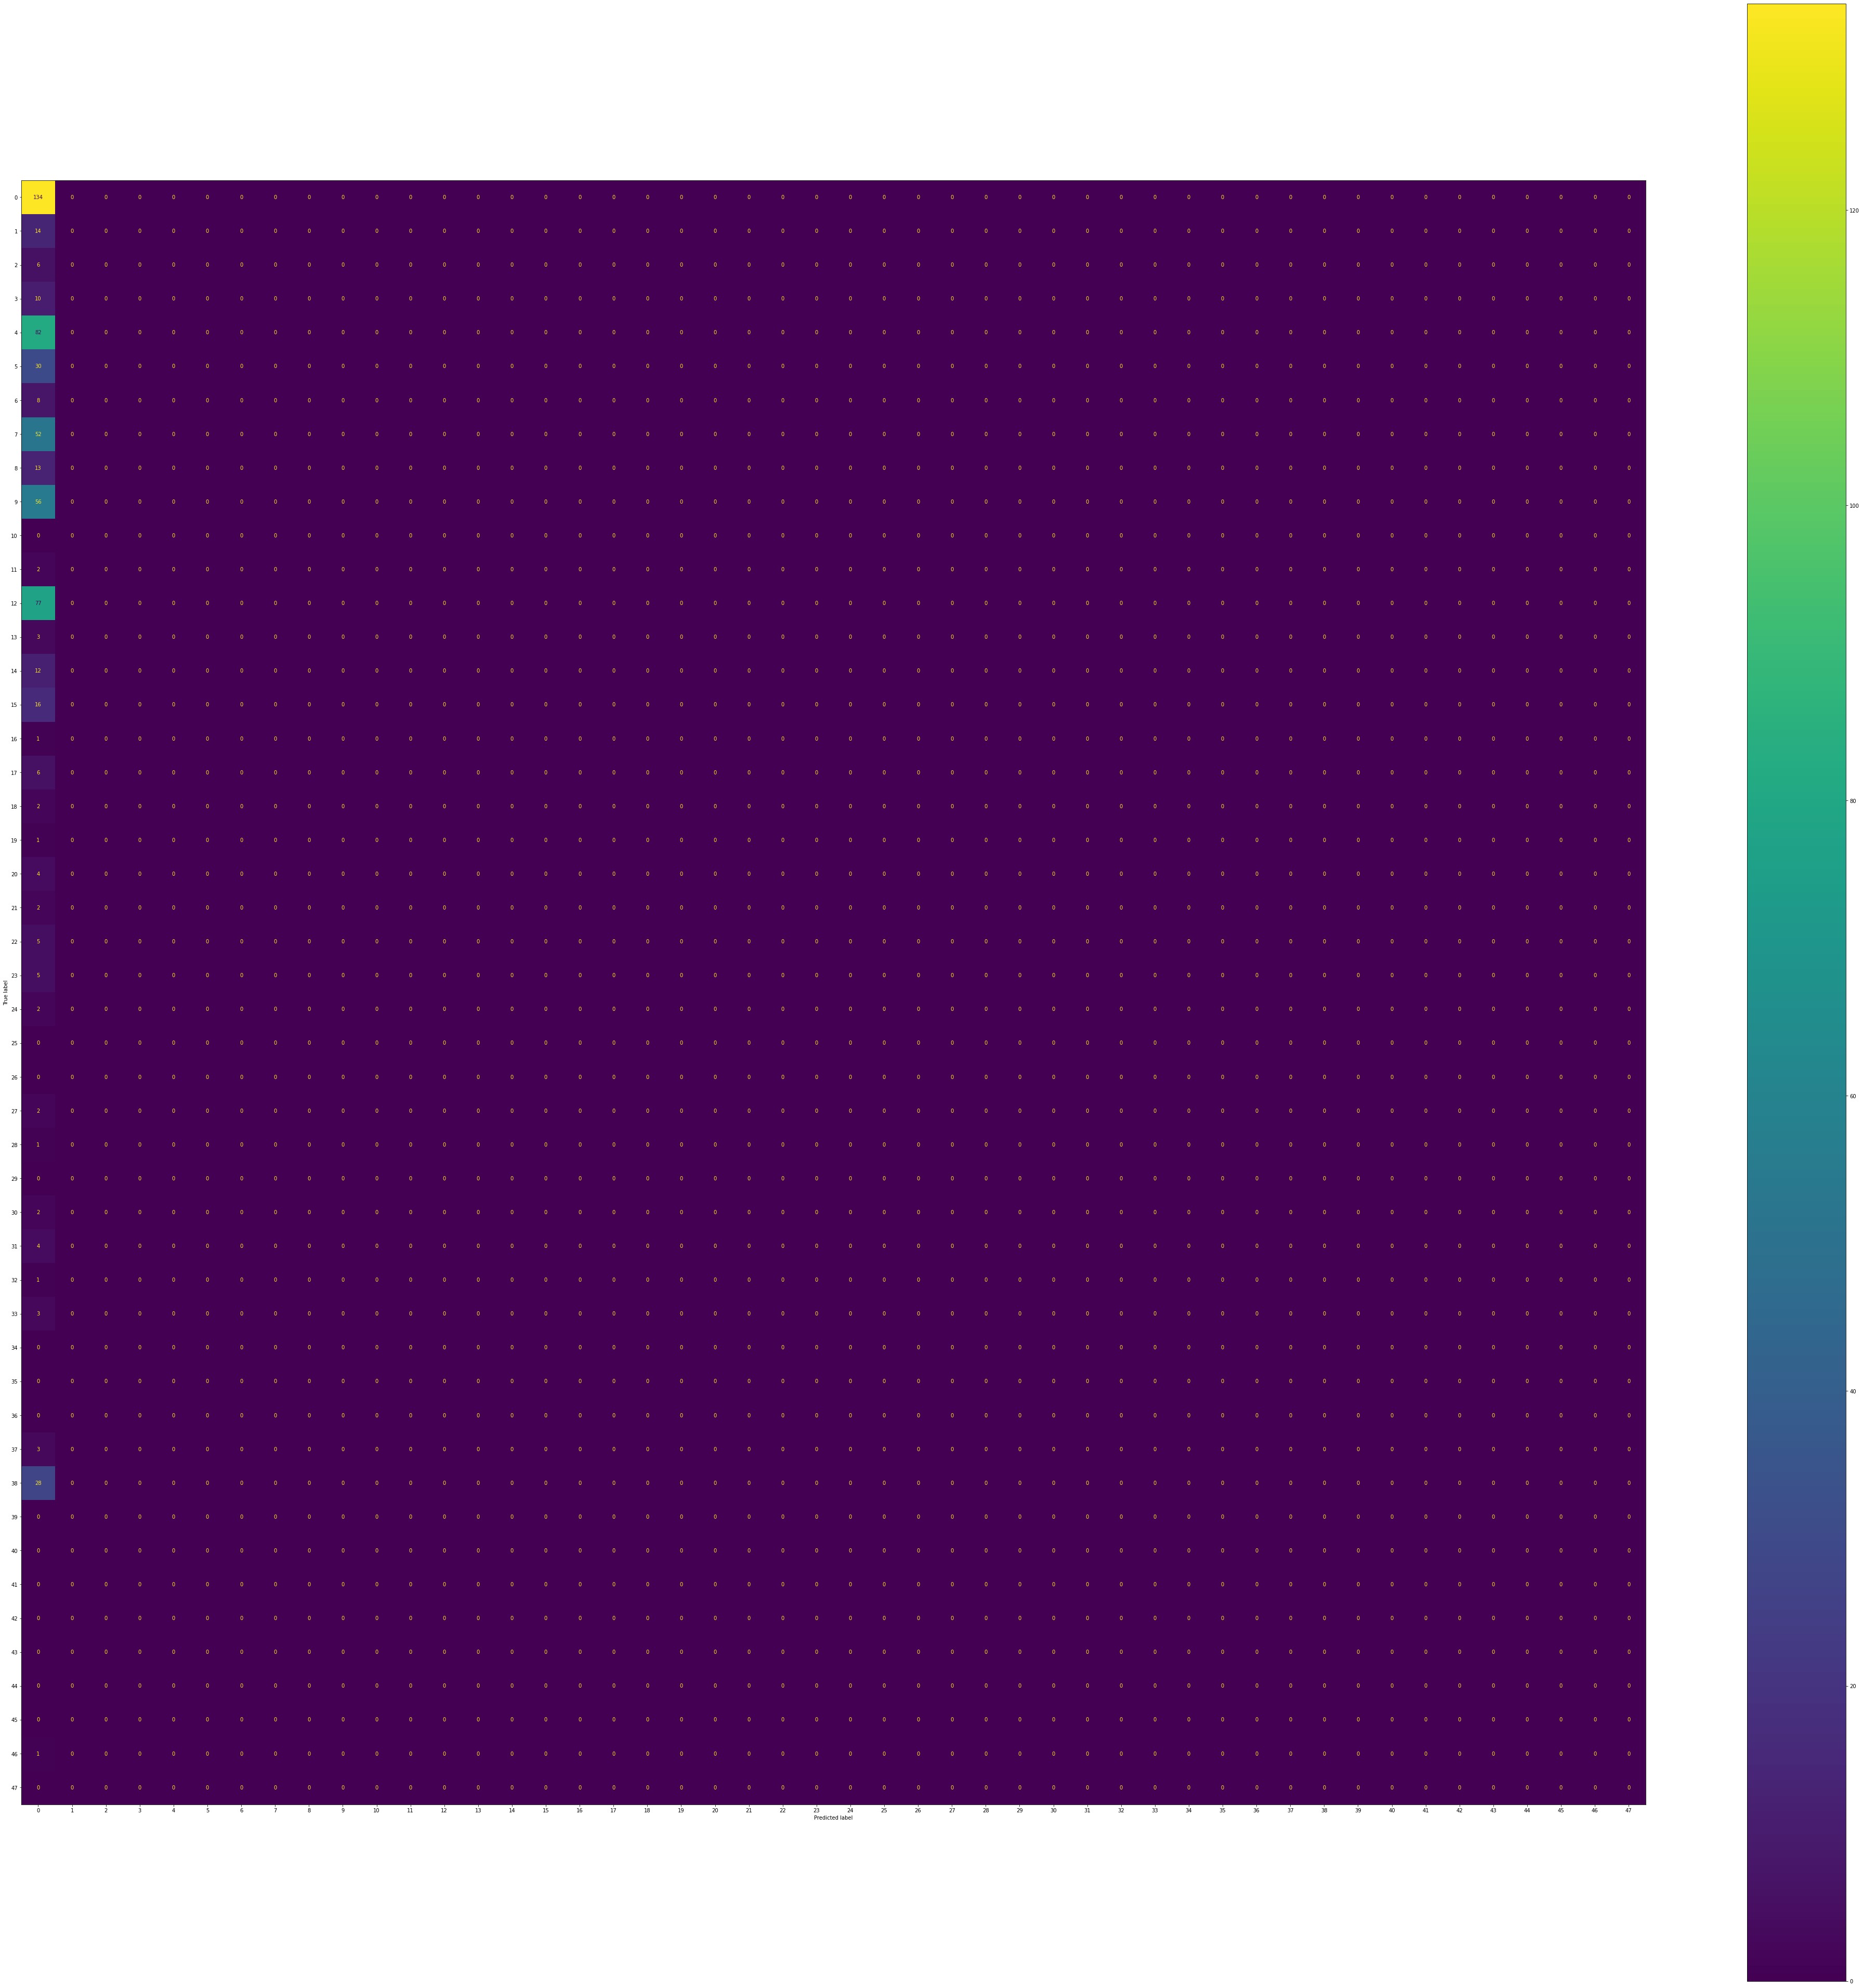

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay
matriz_confusao = confusion_matrix(y_test, y_pred, labels=h.classes_)
matriz = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao)
plt.rcParams["figure.figsize"] = (70, 70)
matriz.plot()



# Gráfico do comportamento da rede de acordo com as épocas (Arquitetura 1)

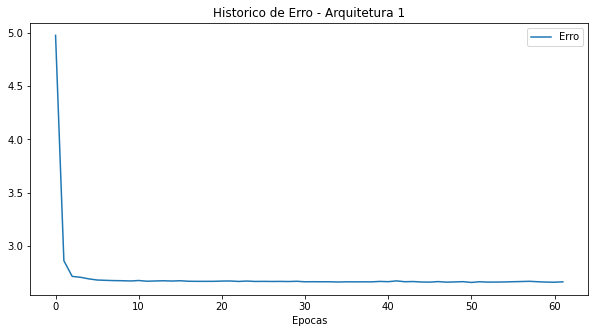

In [21]:
plt.figure(figsize=(10,5))
plt.plot(h.loss_curve_)
plt.title('Historico de Erro - Arquitetura 1')
plt.xlabel('Epocas')
plt.legend(['Erro'])

# 2ª Arquitetura

- 2 camadas ocultas
    A definição da quantidade de neurônios em cada camada será dada pela regra (camada_entrada * (2/3) + camada_saida); 
    Para a segunda camada oculta iremos considerar a primeira camada oculta como a camada de entrada e aplicar a mesma regra;
- função de ativação = logistic
- taxa de aprendizado = 0.1
- solver = 'adam'
- max_inter = 2000
- alpha = 0.001
- random_state = 121

In [22]:
cam_oculta_1 = (camada_entrada *(2/3)) + camada_saida
print(cam_oculta_1)
cam_oculta_2 = (cam_oculta_1 *(2/3)) + camada_saida
print(cam_oculta_2)

67.0
103.66666666666666


In [23]:
#inicialização

Model = MLPClassifier(hidden_layer_sizes=(67,104), activation='logistic',max_iter=20000, alpha=0.001, 
                     solver='adam', random_state=121, learning_rate_init=0.1) 

#train
h = Model.fit(x_train,y_train)

y_pred=Model.predict(x_test)


print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print('O acerto foi de: ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.31      0.33      0.32       134
           1       0.11      0.14      0.12        14
           2       0.00      0.00      0.00         6
           3       0.11      0.10      0.11        10
           4       0.27      0.18      0.22        82
           5       0.17      0.20      0.18        30
           6       0.00      0.00      0.00         8
           7       0.16      0.12      0.13        52
           8       0.25      0.08      0.12        13
           9       0.14      0.20      0.17        56
          11       0.00      0.00      0.00         2
          12       0.24      0.36      0.29        77
          13       0.00      0.00      0.00         3
          14       0.13      0.17      0.15        12
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       0.10      0.06      0.08        16
          18       0.00    

# Matriz de confusão

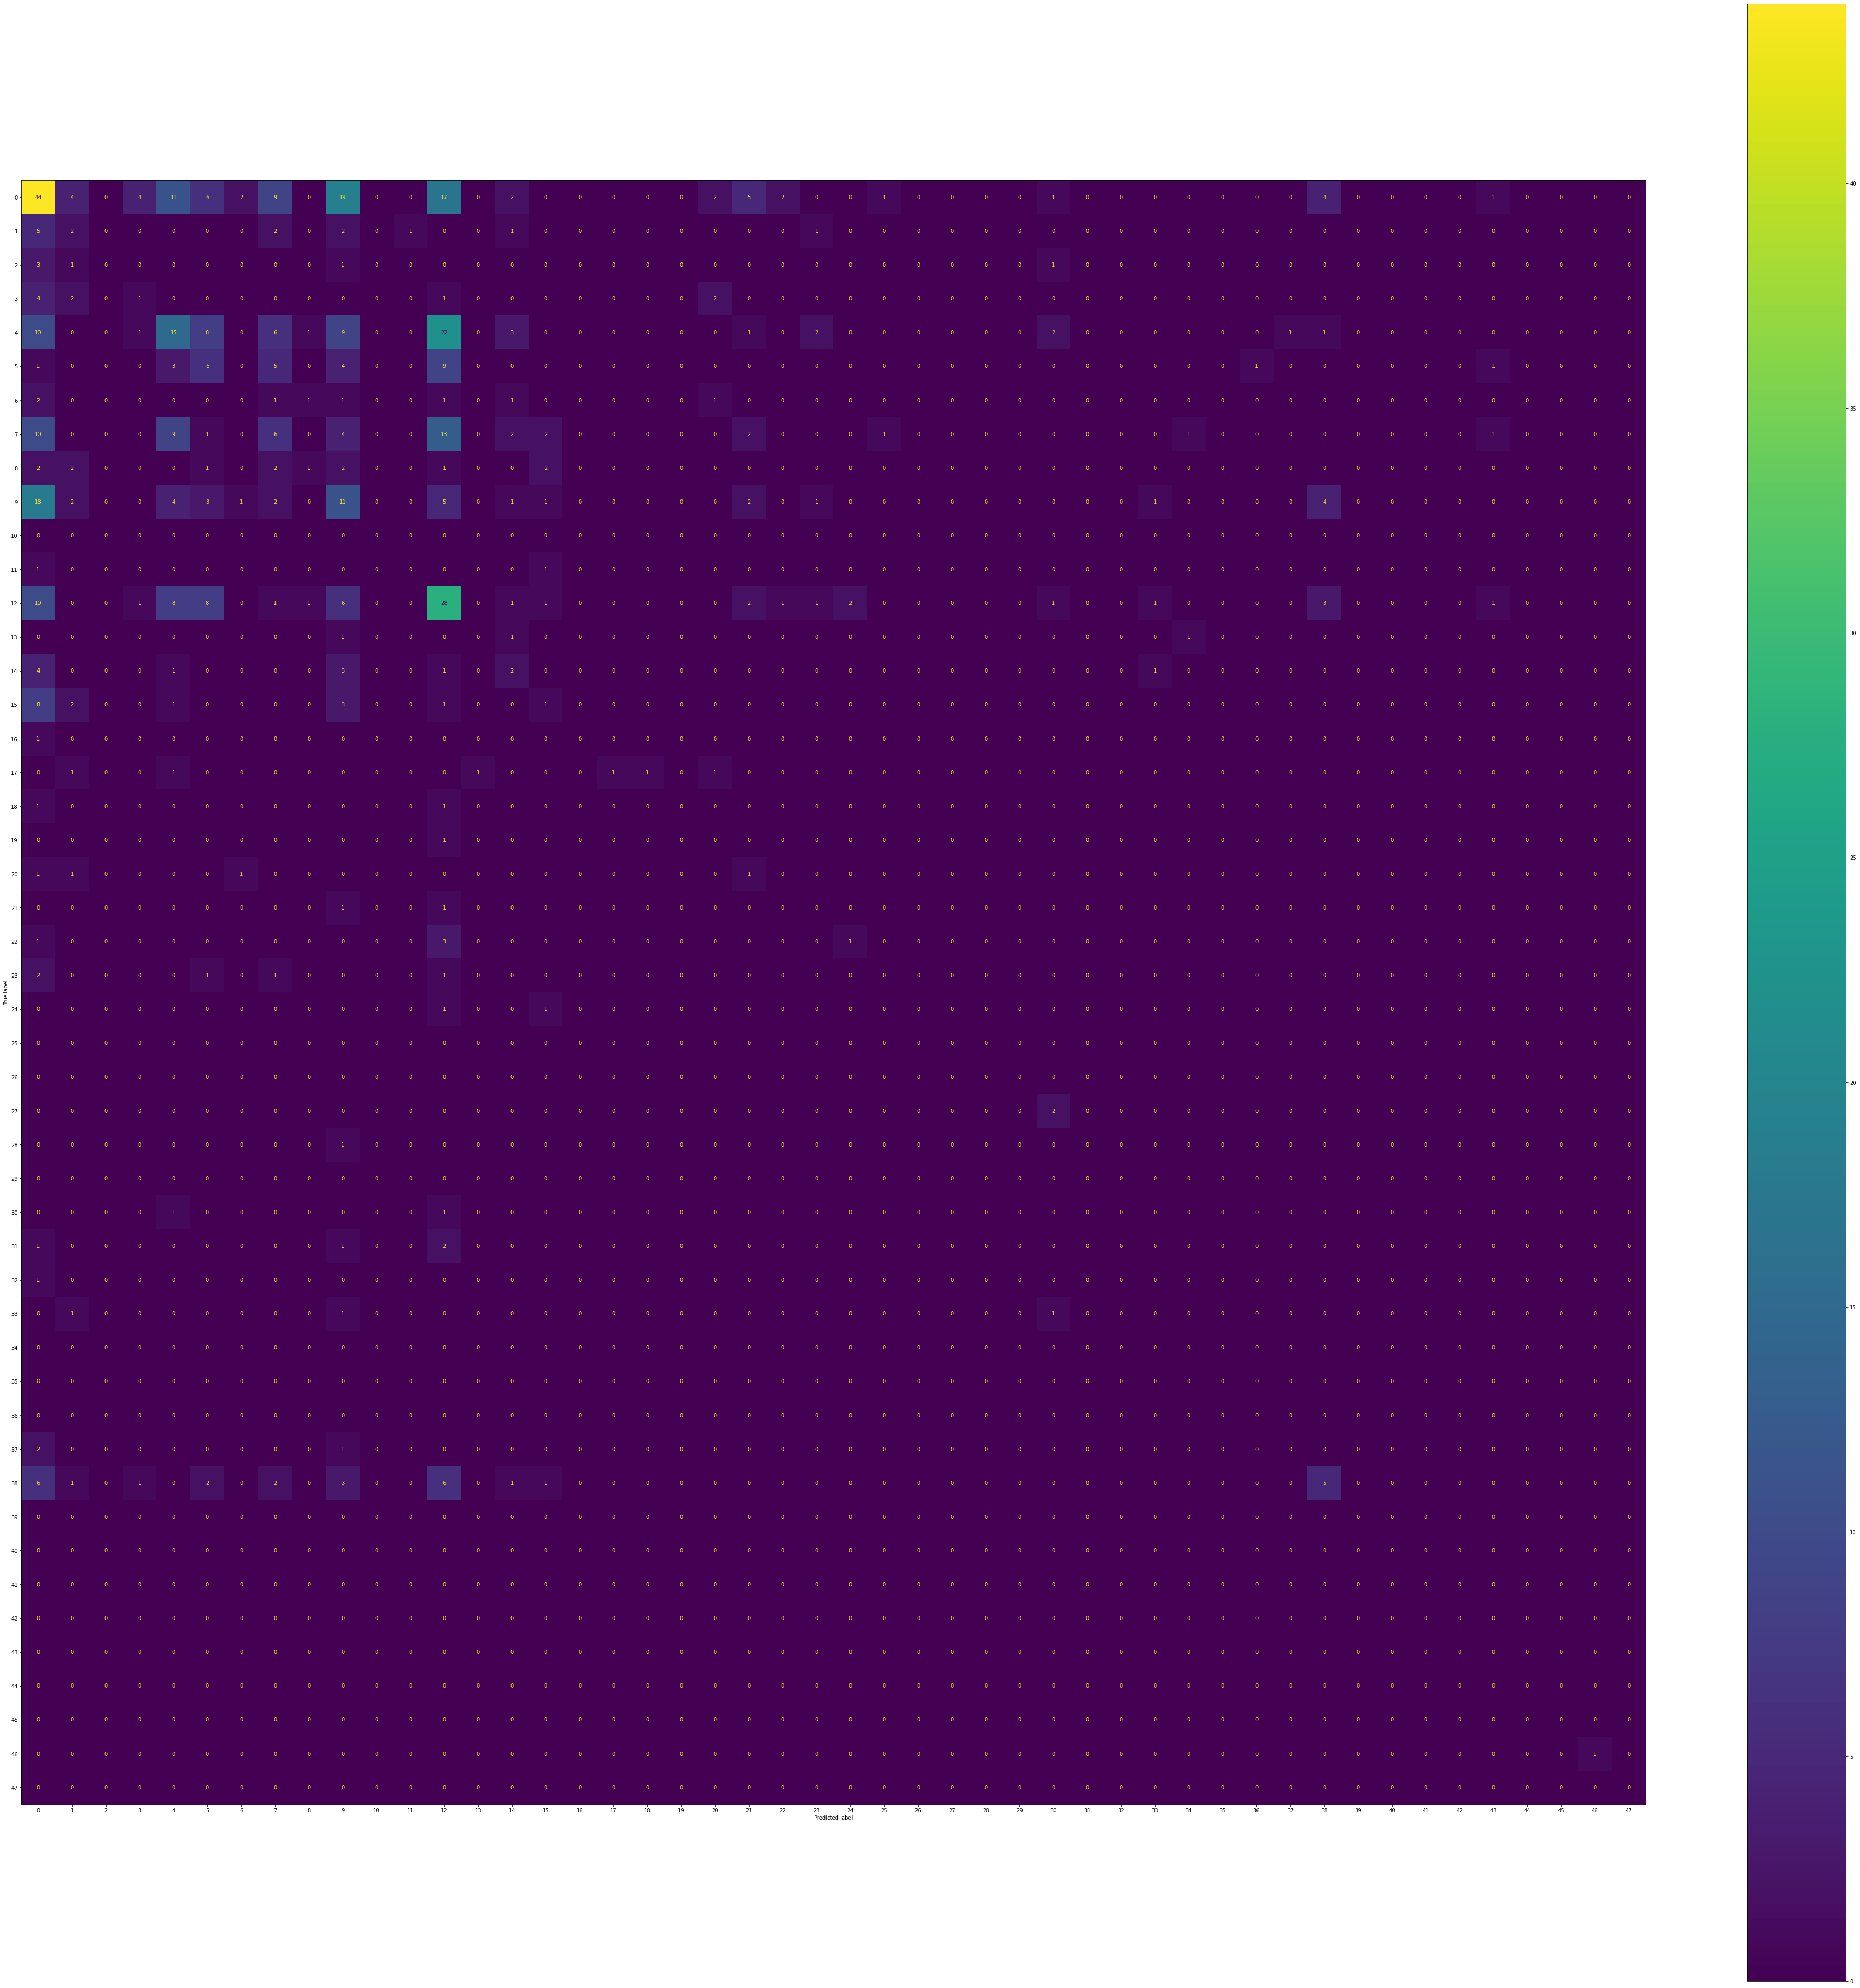

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
matriz_confusao = confusion_matrix(y_test, y_pred, labels=h.classes_)
matriz = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao)
plt.rcParams["figure.figsize"] = (70, 70)
matriz.plot()

# Gráfico do comportamento da rede de acordo com as épocas (Arquitetura 2)

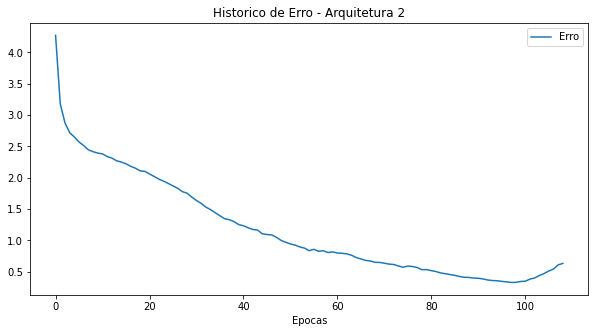

In [25]:
plt.figure(figsize=(10,5))
plt.plot(h.loss_curve_)
plt.title('Historico de Erro - Arquitetura 2')
plt.xlabel('Epocas')
plt.legend(['Erro'])

# Conclusão:

Não tivemos alterações significativas no valor da acurácia entre as duas arquiteturas. O solver do tipo adam foi utilizado devido a quantidade de amostras ser superior a mil, e este é o mais recomendado. No entanto, o valor da acurácia ainda é muito pequeno. 

# 5. Implementação e Teste da Rede K-Means

In [26]:
# Metodo Elbow para definir a quantidade de Cluster (K)
def elbow(dados_escalonados):
    wcss = []
    for i in range(1,11):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state = 5, max_iter = 300)
        kmeans.fit(dados_escalonados)
        wcss.append(kmeans.inertia_)
    # gráfico
    plt.figure(figsize=(10,5))
    sns.lineplot(range(1,11), wcss, marker='o', color='red')
    plt.title('Metodo de Elbow')
    plt.xlabel('Numero de cluster')
    plt.ylabel('WCSS')
    return wcss


[0.18155276 0.1264147 ]
0.30796745776326884
[7391.218986318448, 4741.2323695742725, 3209.291806947851, 2533.8227411533694, 2084.326606449934, 1807.0172413070861, 1533.711240596092, 1363.0896253670946, 1233.091929220196, 1124.3479877198188]


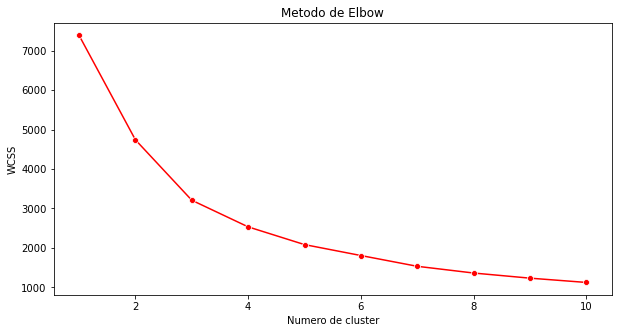

In [27]:
# PCA para plotar o gráfico

from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

dados_pca = pca.fit_transform(dados_padronizados)


# Variáveis explicativas
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

#Elbow
print(elbow(dados_pca))



- Através do gráfico assim que representa o método de Elbow para o nosso dataset, podemos concluir que o melhor número de clusters para o K-Means é 3.

In [28]:
# implementação e teste K-Means

kmeans = KMeans(n_clusters=3,init="k-means++",random_state=0)
kmeans_ = kmeans.fit(dados_pca)

centroides = kmeans_.cluster_centers_

agrupamento = kmeans_.labels_
agrupamento



array([1, 2, 0, ..., 1, 0, 2])

# Gráfico de clusteres

In [29]:

import plotly.express as px
import plotly.graph_objects as go

graf1 = px.scatter(x=dados_pca[:,0], y=dados_pca[:,1], color=agrupamento)
graf2 = px.scatter(x=centroides[:,0], y=centroides[:,1], size = [15,15,15]) 
graf3 = go.Figure(data = graf1.data + graf2.data)
graf3.update_layout(width=800,height=500,title_text='Agrupamento K-Means com PCA')
graf3.show()

      popularidade  dancabilidade   energia     chave    volume      modo  \
0         0.802968       0.595254  0.744130 -1.211348  0.035403 -1.113392   
1         0.896731      -1.662882  1.156685 -1.488038  0.307519  0.898156   
2         0.287268      -0.986153 -1.469257  0.448791 -1.807847  0.898156   
3         0.849850      -0.829437  1.261461 -1.488038  0.749837 -1.113392   
4         0.240386      -0.380660  1.359688  0.725481  0.365460 -1.113392   
...            ...            ...       ...       ...       ...       ...   
1995      0.896731       1.243488  0.089282 -1.211348  0.231472 -1.113392   
1996      0.849850      -0.822314 -0.120269  1.002171 -0.100655  0.898156   
1997      0.427914       1.279105 -0.277433  1.002171 -1.615400  0.898156   
1998      0.709204       0.524019 -1.312094  0.725481 -1.034954  0.898156   
1999      1.178022       0.196340  0.272640 -1.488038  1.042647  0.898156   

          fala  acustico  instrumentalidade  vivacidade  valencia     tempo

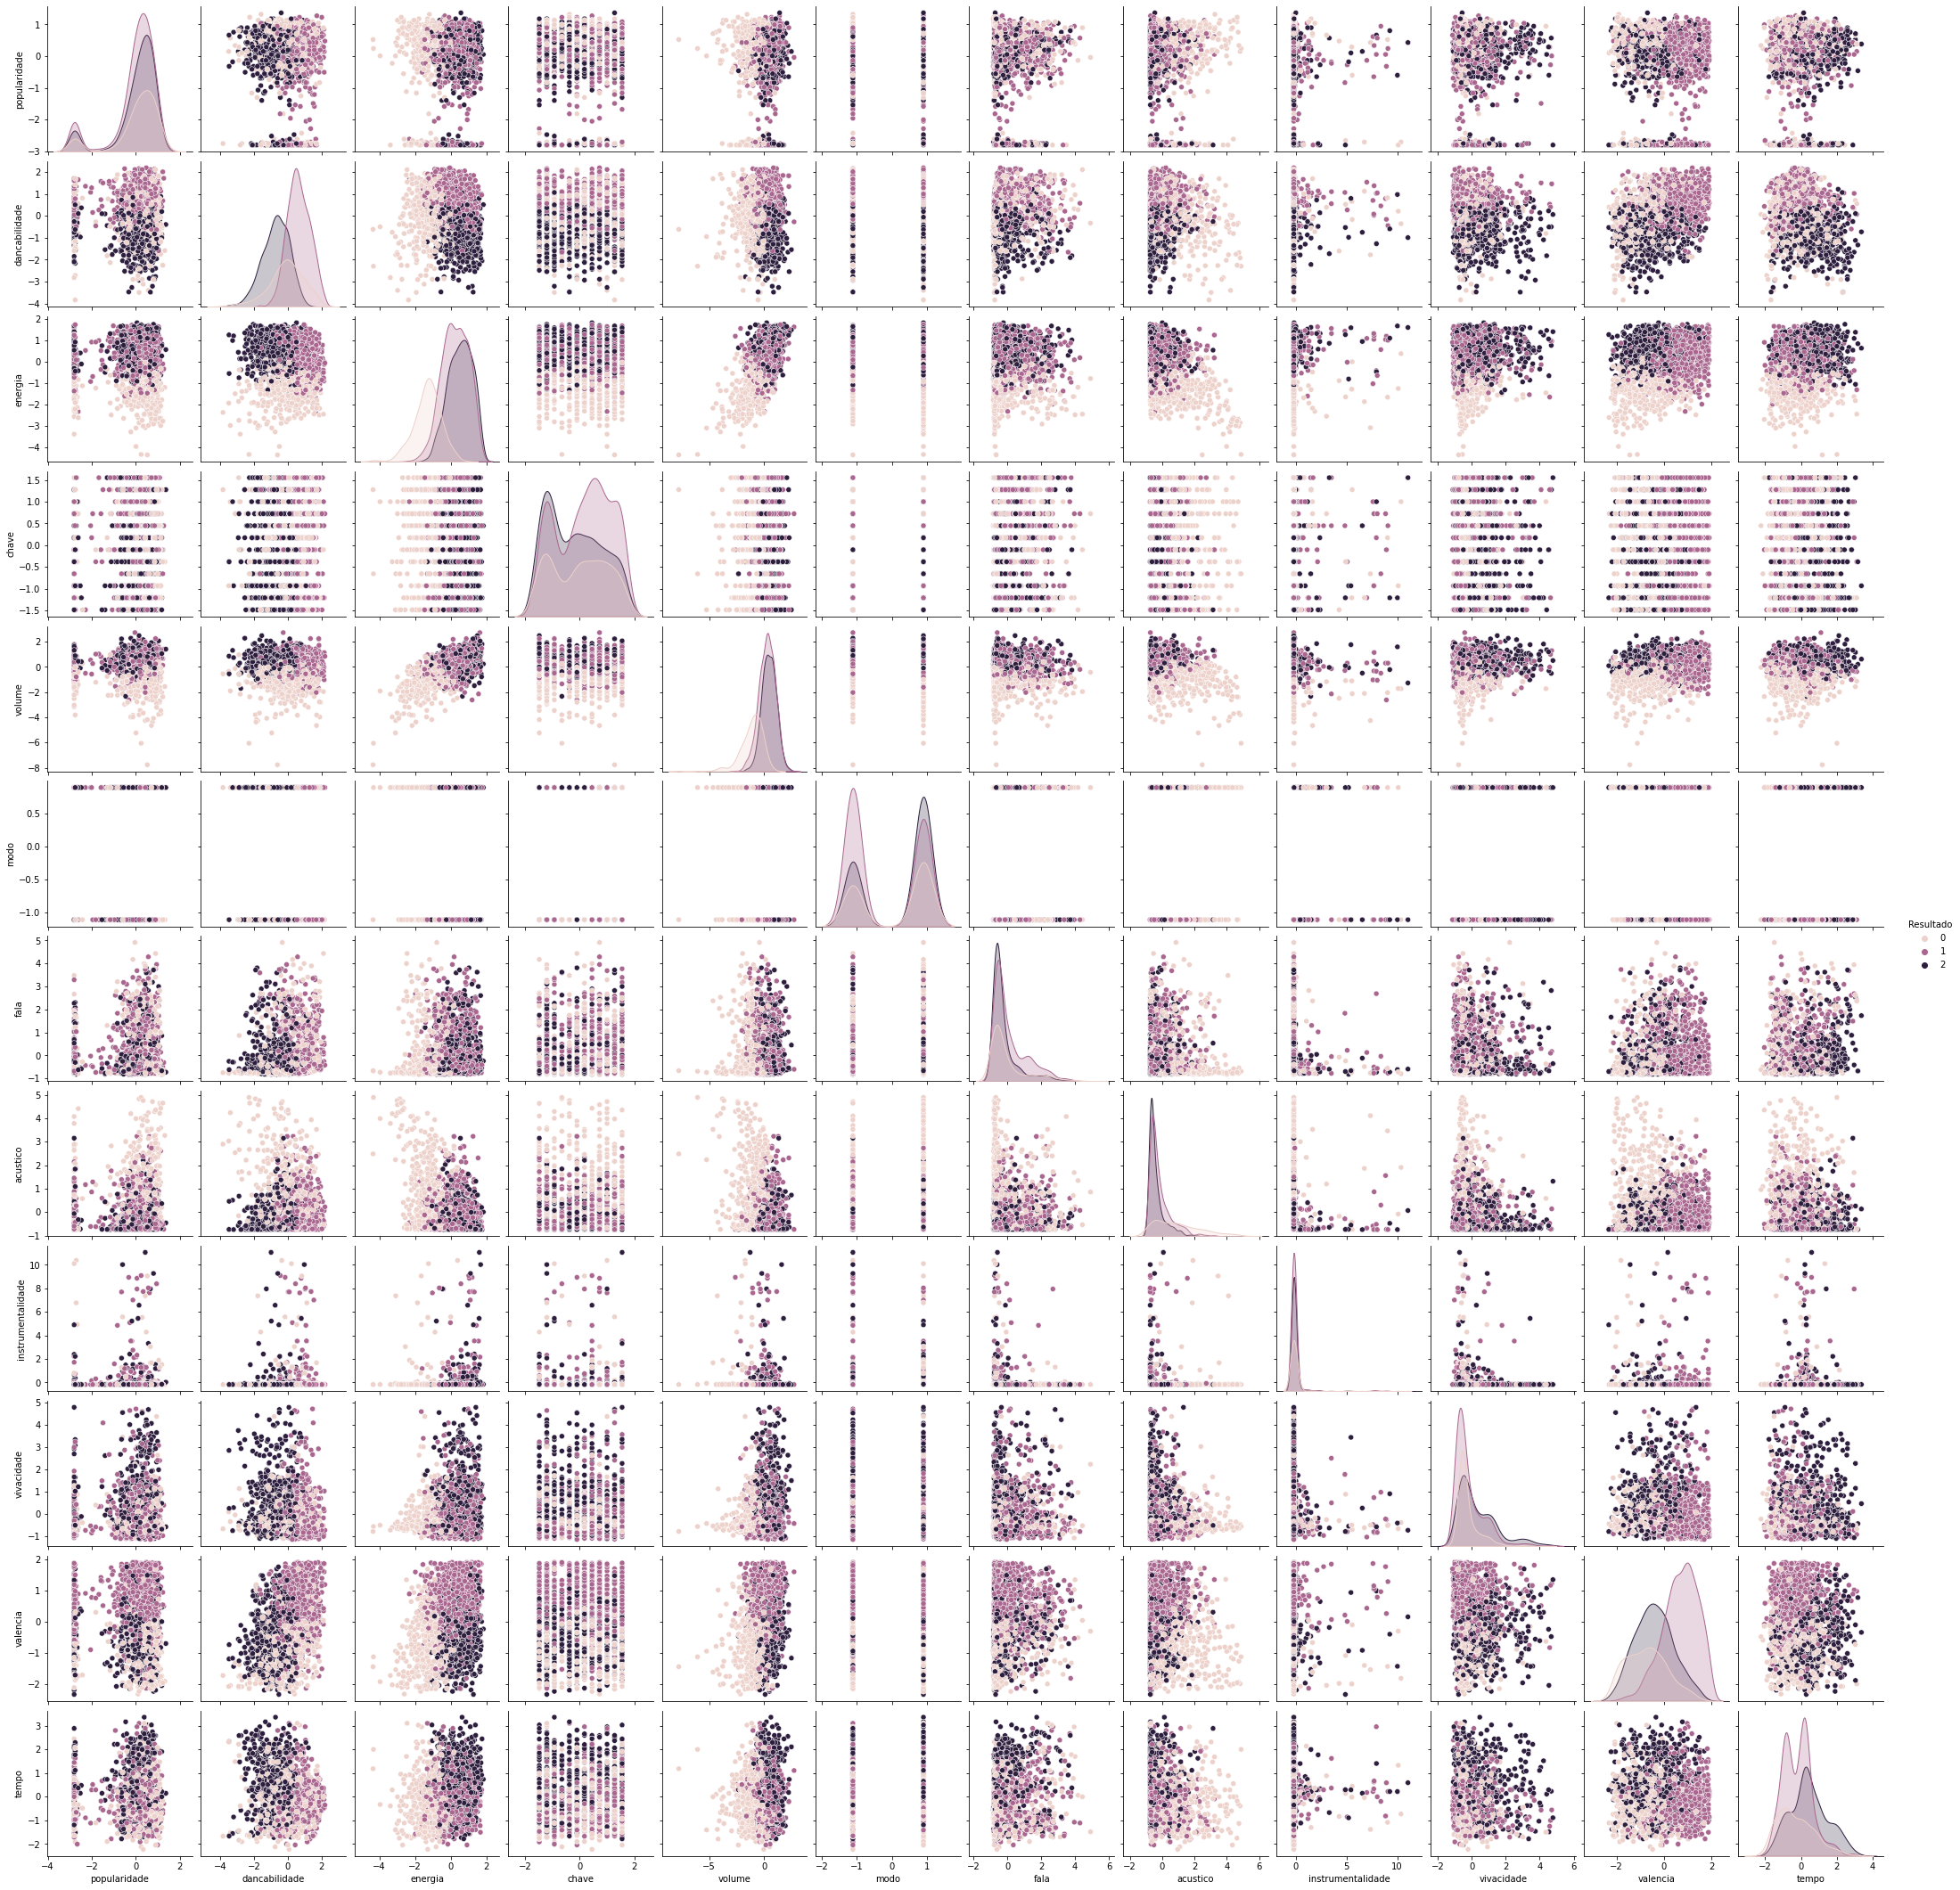

In [30]:
dados_padronizados['Resultado'] = kmeans.labels_
print(dados_padronizados)
sns.pairplot(dados_padronizados, hue='Resultado')

# 6. Conclusão do Projeto

O projeto apresentado permitiu que a aplicação de algoritmos importantes e conhecidos no âmbito do conhecimento de deep learning e machine learning, através do MLPCLassifier e do K-Means, aplicando o conteúdo de rede neurais e clusterização respectivamente. 

A base de dados estudadas é complexa no sentido de oferecer uma alto valor de neurônios de saida (58 no total), representado pelo gênero das 2000 músicas mais tocadas nos últimos 20 anos. O que proporciona gráficos complexos para interpretação, mas que através das técnicas de validação como a acurácia e a matriz de confusão auxilia no seu entendimento. Outro ponto importante, é a aplicação de técnicas de visualização, como o gráfico de comportamento da rede e o gráfico de cluster, contribui para a validação e avaliação das técnicas de machine e deep learning aplicadas.

A execução do projeto contribuiu para a consolidação de conteúdos importantes como parametros, técnicas de visualização e técnicas de análise e validação. 
